# Emotions Detection in Text

In [6]:
# EDA
import pandas as pd
import numpy as np

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
# Load Dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\AI_ML-1\AI-ML-1\Emotion Detection\Emotions dataset.csv")

In [26]:
df.head()

Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

In [27]:
# Value Counts
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

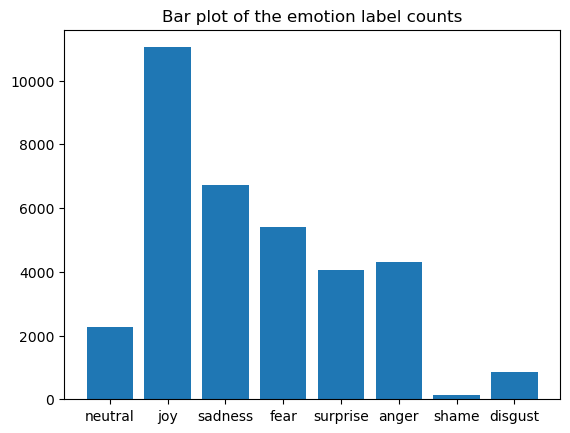

In [28]:
#Create a bar plot of the emotion label counts
import matplotlib.pyplot as plt
count = [] #counts of distinct emotions
emotions = df['Emotion'].unique() #names of distinct emotions
for i in emotions:
  count.append(df[df['Emotion']==i]['Emotion'].count()) #ensures same order of emotions and their counts

plt.bar(emotions, count)
plt.title('Bar plot of the emotion label counts')
plt.show()

In [29]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [30]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [8]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

## We are not removing Special Characters as some of the rows have just Special Characters and it'll result into empty row.

In [31]:
df

Emotion                                               Text  \
0       neutral                                             Why ?    
1           joy    Sage Act upgrade on my to do list for tommorow.   
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           joy   Such an eye ! The true hazel eye-and so brill...   
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...         ...                                                ...   
34787  surprise  @MichelGW have you gift! Hope you like it! It'...   
34788       joy  The world didnt give it to me..so the world MO...   
34789     anger                           A man robbed me today .    
34790      fear  Youu call it JEALOUSY, I call it of #Losing YO...   
34791   sadness  I think about you baby, and I dream about you ...   

                                              Clean_Text  
0                                                 Why ?   
1        Sage Act upgrade on my to do list for tommorow.  
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...  
3       Such an eye ! The true hazel eye-and so brill...  
4        ugh babe.. hugggzzz for u .!  babe naamazed ...  
...                                                  ...  
34787    have you gift! Hope you like it! It's hand m...  
34788  The world didnt give it to me..so the world MO...  
34789                           A man robbed me today .   
34790  Youu call it JEALOUSY, I call it of #Losing YO...  
34791  I think about you baby, and I dream about you ...  

[34792 rows x 3 columns]

In [32]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

# It is advisable to split before applying pipelines because it prevents data leakage.

In [33]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [34]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [35]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [36]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [37]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [38]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6323050392795555

In [39]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [40]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [41]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[6.83622928e-03, 1.14122936e-02, 2.46542345e-03, 8.64498019e-01,
        1.82112491e-03, 1.55372194e-02, 7.57126740e-05, 9.73539774e-02]])

In [42]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

C:\Users\HP\AppData\Local\Temp\ipykernel_12280\2018136738.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


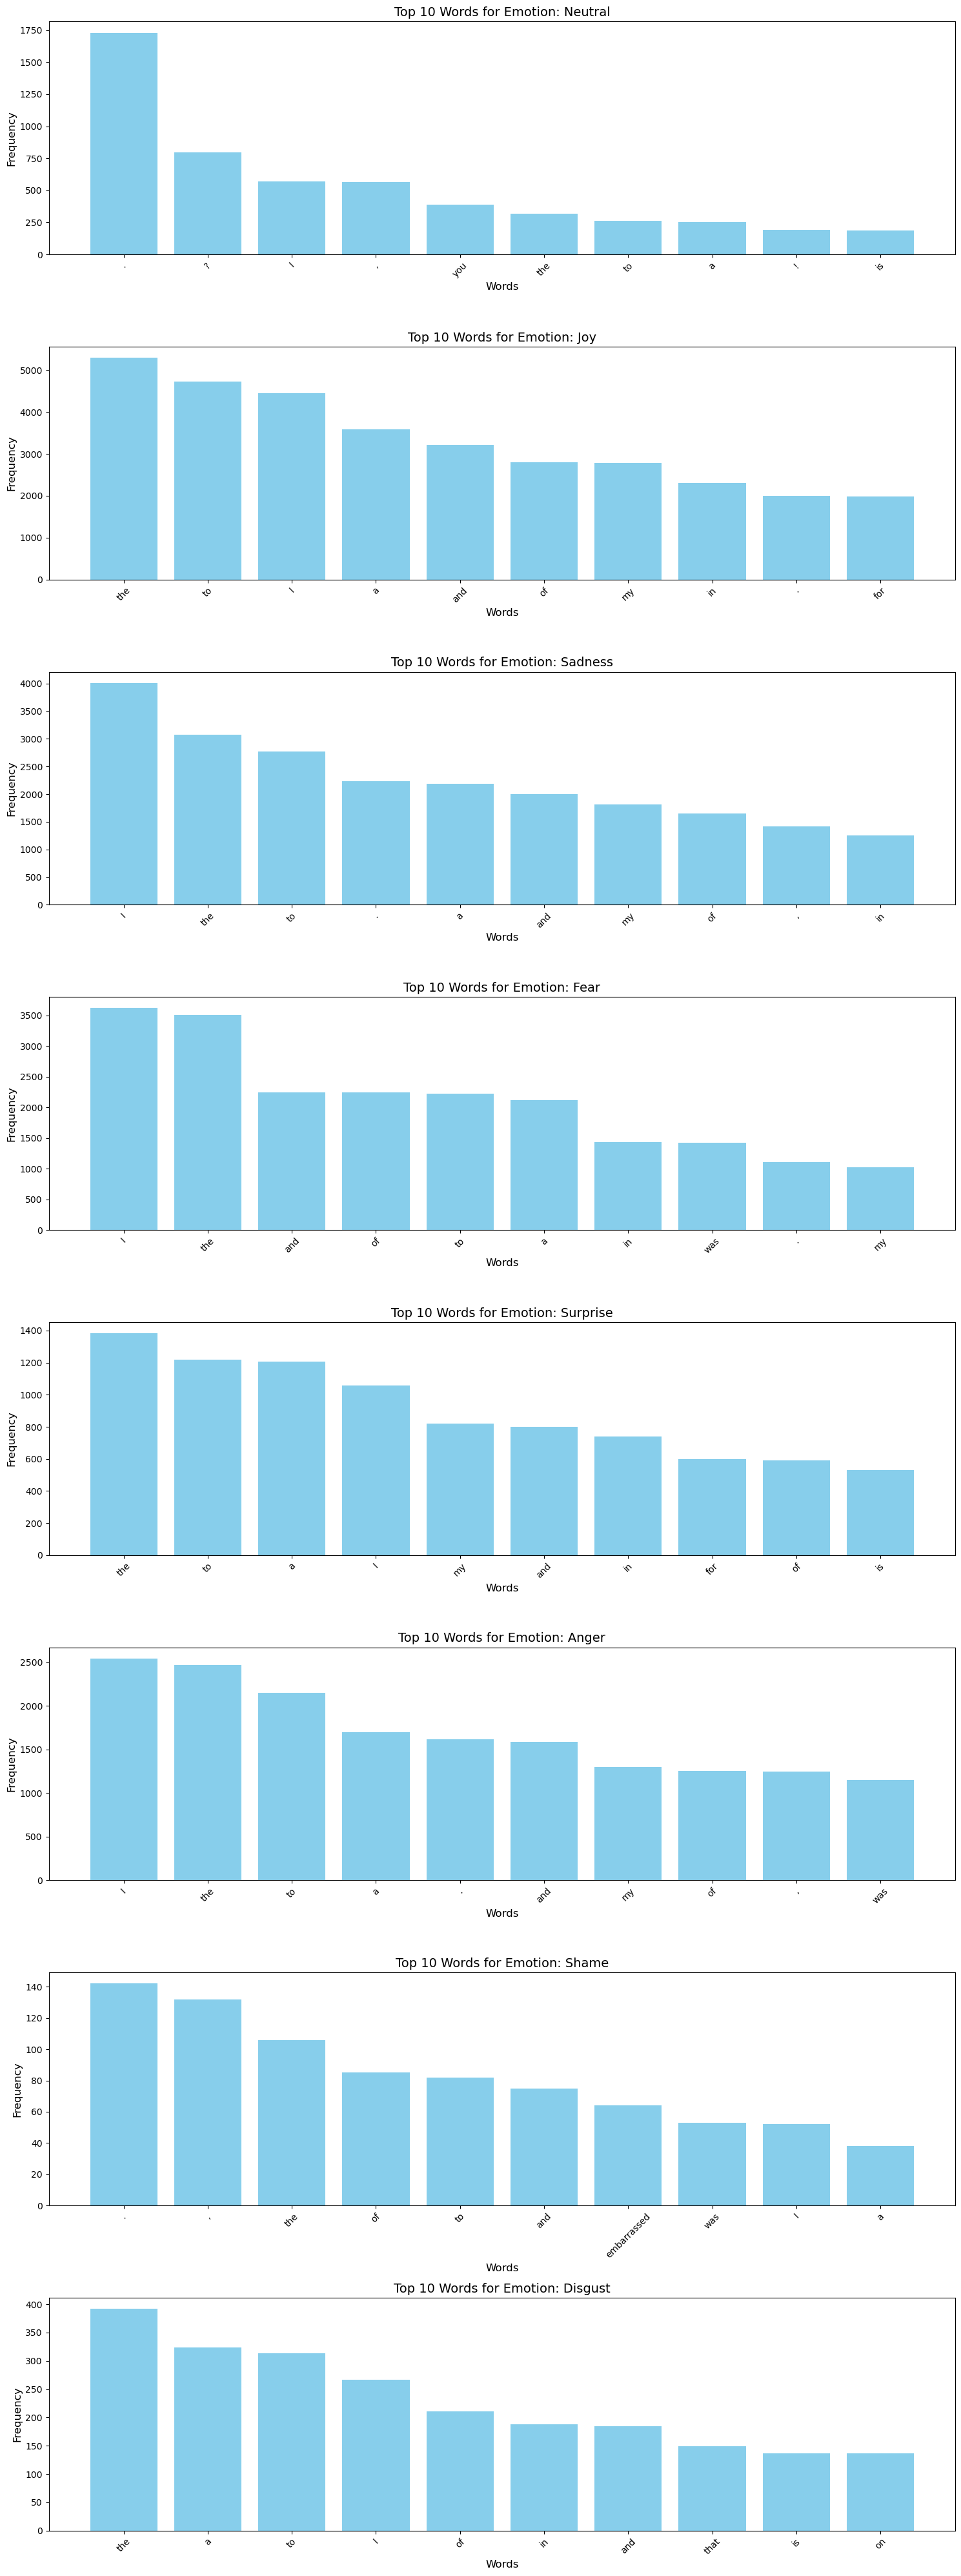

In [43]:
# Import necessary libraries
import matplotlib.pyplot as plt
from collections import Counter

# Function to calculate the top N frequent words for a given emotion
def get_top_words(emotion, top_n=10):
    # Filter rows for the specific emotion
    emotion_texts = df[df['Emotion'] == emotion]['Clean_Text']
    # Flatten the list of words
    all_words = [word for text in emotion_texts for word in text.split()]
    # Count word frequencies
    word_counts = Counter(all_words)
    # Return the top N words
    return word_counts.most_common(top_n)

# Visualization: Bar chart for each emotion
def plot_top_words(df, top_n=10):
    emotions = df['Emotion'].unique()  # Get unique emotions
    plt.figure(figsize=(15, len(emotions) * 5))  # Adjust figure size based on the number of emotions

    for i, emotion in enumerate(emotions):
        top_words = get_top_words(emotion, top_n)
        words, counts = zip(*top_words)
        
        # Create subplot for each emotion
        plt.subplot(len(emotions), 1, i + 1)
        plt.bar(words, counts, color='skyblue')
        plt.title(f"Top {top_n} Words for Emotion: {emotion.capitalize()}", fontsize=14)
        plt.xlabel("Words", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.tight_layout()

    plt.show()

# Call the function to visualize top words for each emotion
plot_top_words(df, top_n=10)


In [45]:
def predict_emotion(text):
    if not isinstance(text, str) or not text.strip():
        return "Invalid input: Please provide a non-empty text."

    return pipe_lr.predict([text])[0]

# Example Usage
ex1 = "This book was so interesting it made me happy"
ex2 = ""  # Empty input
ex3 = "   "  # Input with only spaces
ex4 = None  # Invalid type

print(predict_emotion(ex1))  # Should return a valid prediction
print(predict_emotion(ex2))  # Should return "Invalid input: Please provide a non-empty text."
print(predict_emotion(ex3))  # Should return "Invalid input: Please provide a non-empty text."
print(predict_emotion(ex4))  # Should return "Invalid input: Please provide a non-empty text."


joy
Invalid input: Please provide a non-empty text.
Invalid input: Please provide a non-empty text.
Invalid input: Please provide a non-empty text.


In [ ]:
'''visualize the confusion matrix with labels and a color gradient'''

y_pred = pipe_lr.predict(x_test)

emotions = pipe_lr.classes_
conf_matrix = confusion_matrix(y_test, y_pred, labels=emotions)

#normalizing
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)

#visualizing
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=emotions, yticklabels=emotions)

plt.title("Confusion Matrix (Normalized)", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# abcd